# How do these courses relate?

## 
A large number of the coures that are offered within this training program are related to one another and combine together to create "Pathways". The intention for these pathways is for 

In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'data/admin/workshop_details.csv'
data = pd.read_csv(file_path)
display(data.head())

,workshop_name,pre_reqs,pathways,workshop_description,live_regresitration_boolean,signup_closing_date,next_session_date,VerboseNextSession,InstallationLink,installation_instructions
0,Introduction to Python,NaN,"HPC, Python DS",Over two sessions learn the fundamentals of Py...,N,25/10/2023,"1/11/2023, 8/11/2023",NaN,https://uniexeterrse.github.io/intro-to-pytho...,NaN
1,Python for Data Analysis,Introduction to Python,Python DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Introduction to R,NaN,R DS,Over three sessions this workshop will provide...,Y,02/01/2024,"9/1/2024, 16/1/2024, 23/1/2024",NaN,https://uniexeterrse.github.io/intro-to-r/setu...,NaN
3,Regression analysis with R,Introduction to R,R DS,In this hands on workshop you will learn how t...,Y,19/01/2024,26/01/2024,NaN,https://uniexeterrse.github.io/intro-to-r/setu...,NaN
4,Advanced Regression Analysis With R,Regression analysis with R,R DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
!pip install pyviz==0.9

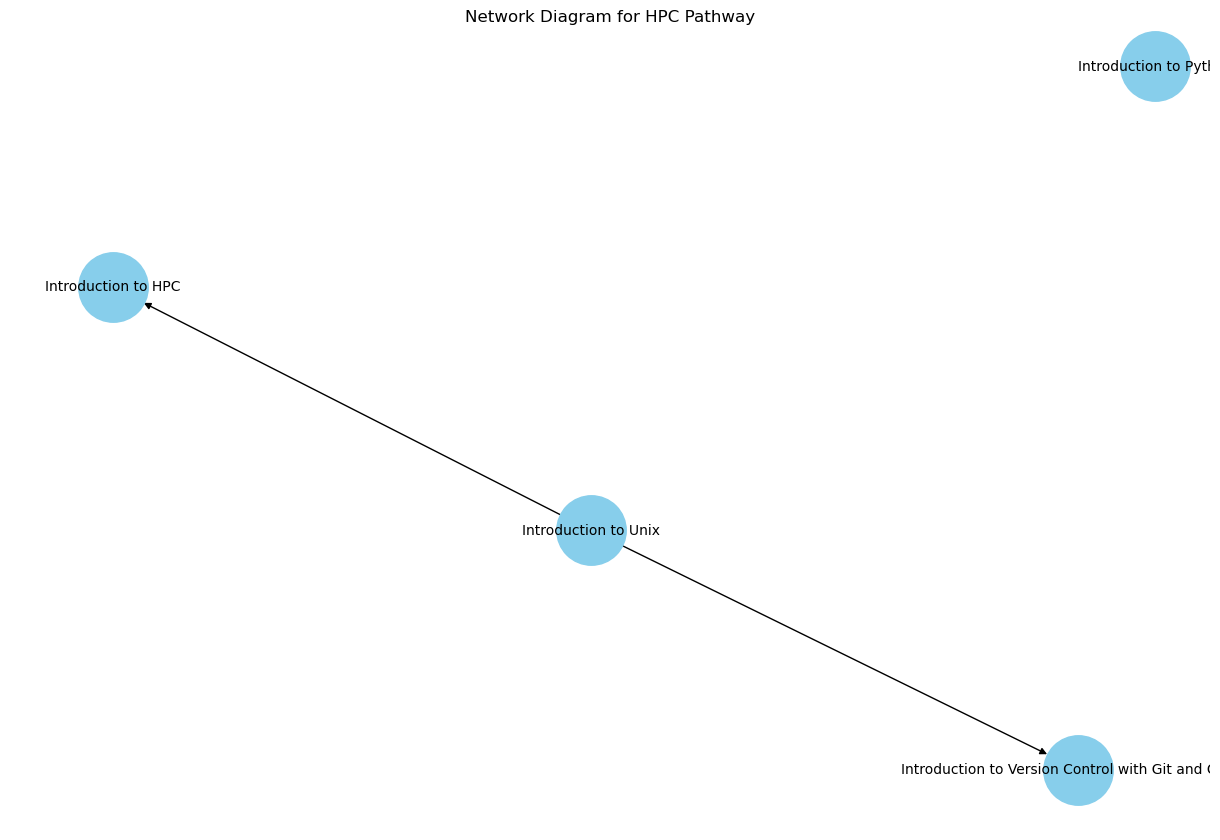

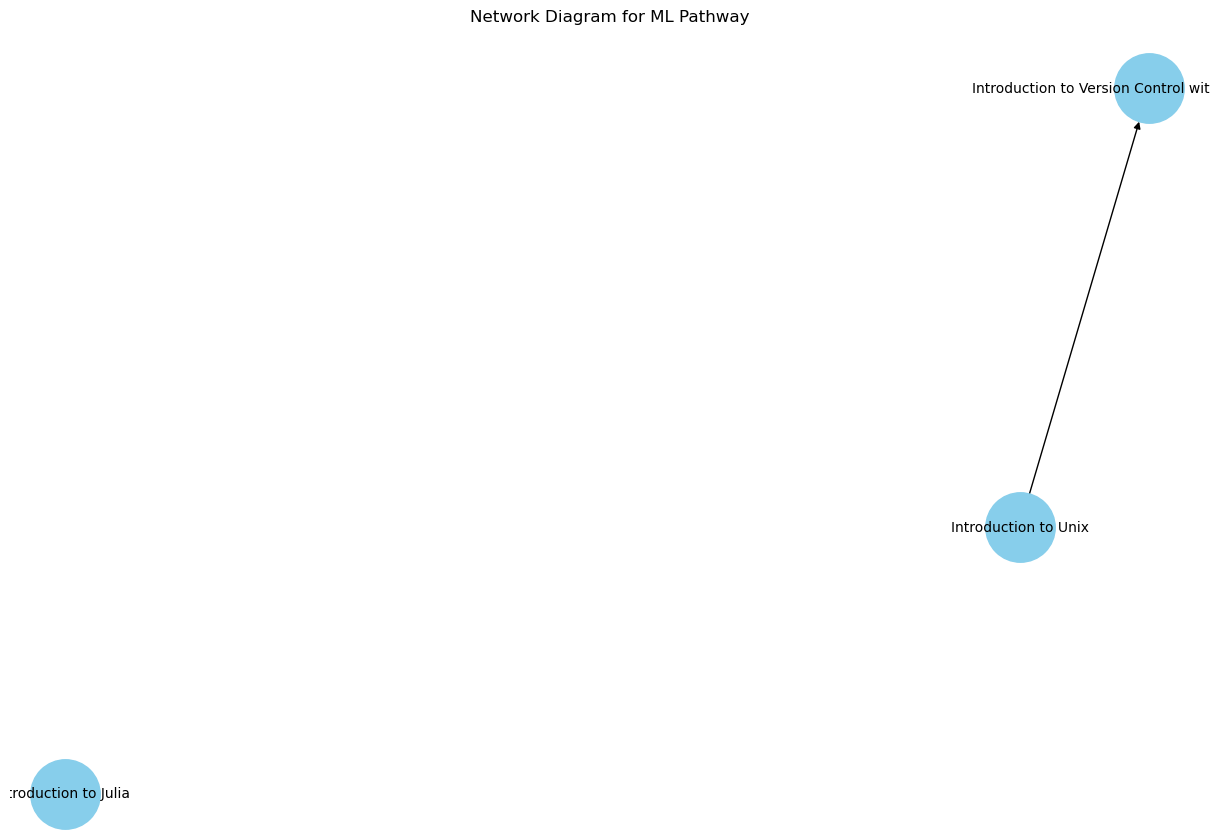

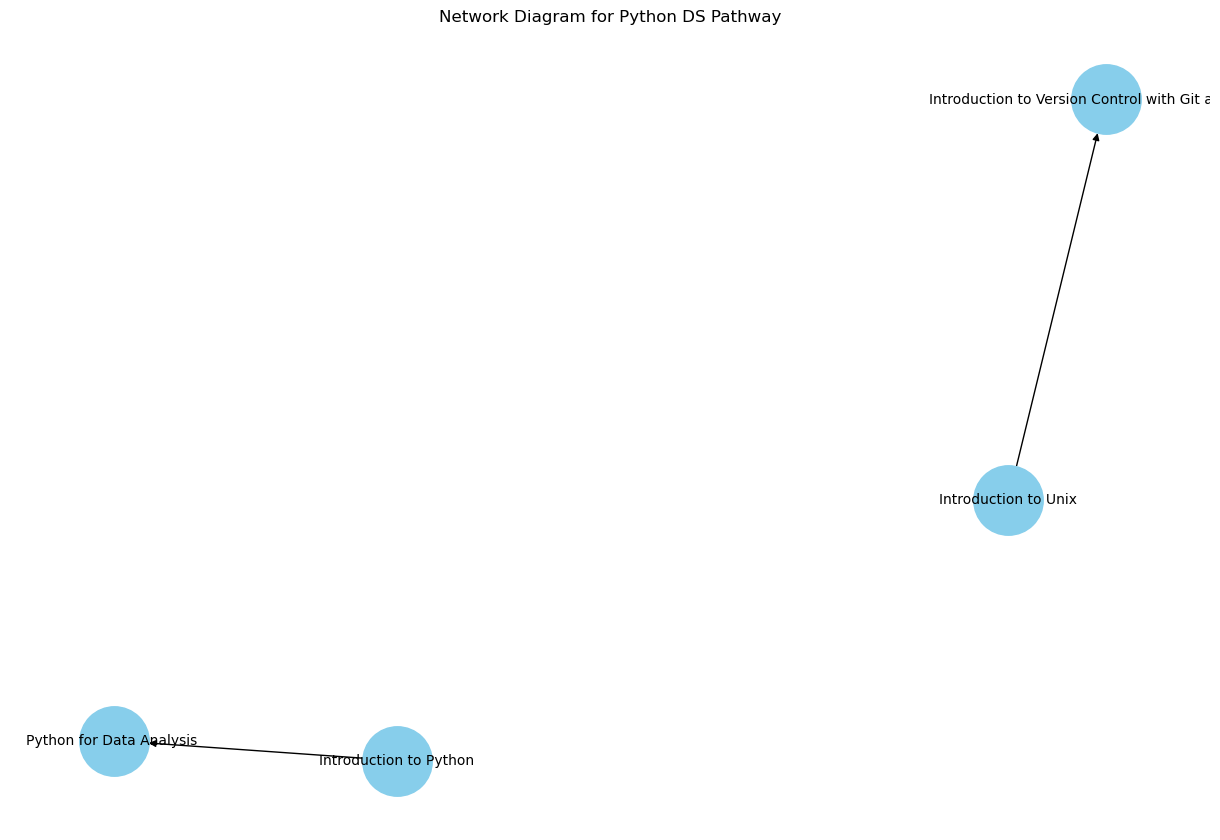

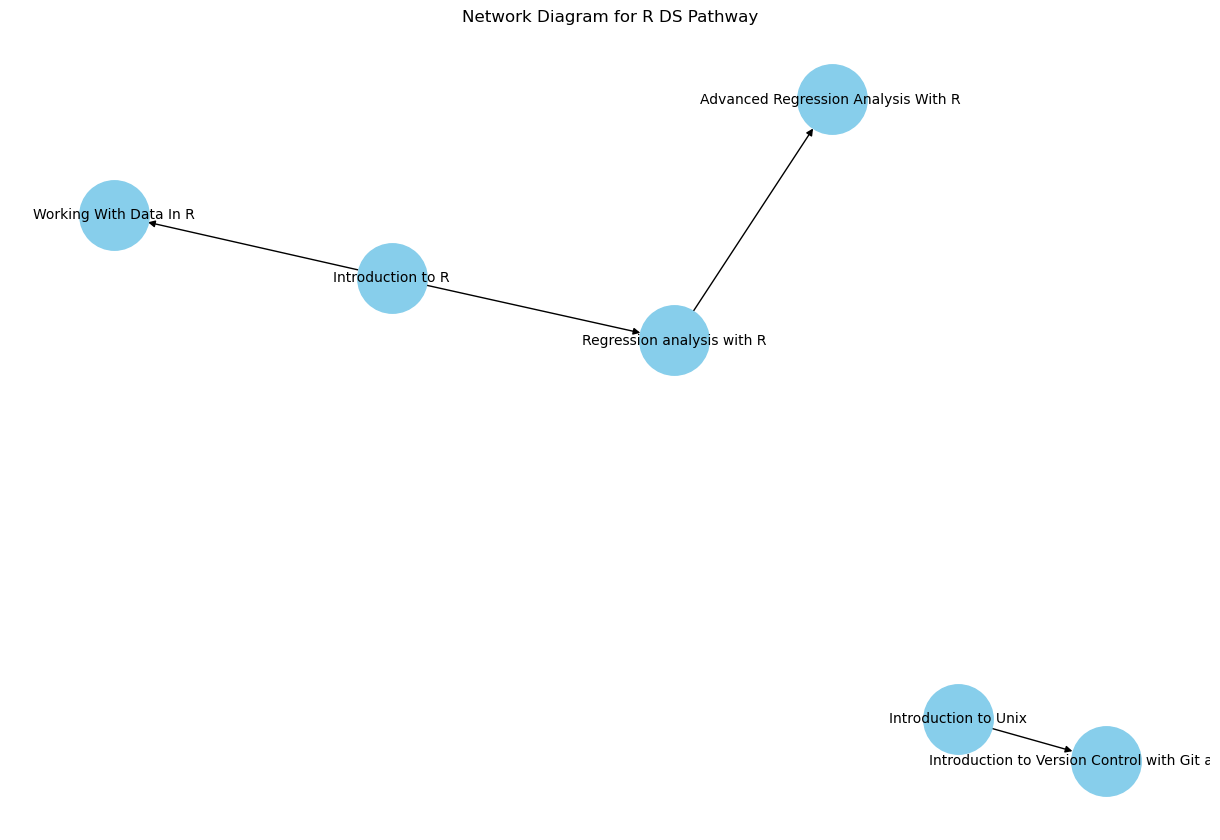

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'data/admin/workshop_details.csv'
workshop_data = pd.read_csv(file_path)

# Ensure all prerequisite and pathway entries are strings
workshop_data['pre_reqs'] = workshop_data['pre_reqs'].apply(lambda x: '' if pd.isna(x) else x)
workshop_data['pathways'] = workshop_data['pathways'].apply(lambda x: '' if pd.isna(x) else x)

# Expand the dataset so that each course appears under each pathway it's listed under
rows_list = []
for _, row in workshop_data.iterrows():
    pathways = row['pathways'].split(',')
    for pathway in pathways:
        pathway = pathway.strip()
        if pathway:  # Check if the pathway is not an empty string
            expanded_row = row.copy()
            expanded_row['pathways'] = pathway
            rows_list.append(expanded_row)

expanded_workshop_data = pd.DataFrame(rows_list)

# Function to draw the network graph using matplotlib
def draw_network(graph, title):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(graph)  # positions for all nodes
    nx.draw(graph, pos, with_labels=True, node_color='skyblue', node_size=2500, edge_color='k', linewidths=1, font_size=10, arrows=True)
    plt.title(title)
    plt.show()

# Create a directed graph for each pathway
pathway_graphs = {}
for pathway, group in expanded_workshop_data.groupby('pathways'):
    G = nx.DiGraph()
    for _, row in group.iterrows():
        workshop = row['workshop_name']
        pre_reqs = row['pre_reqs']
        G.add_node(workshop)  # Add node for each workshop
        if pre_reqs:
            prerequisites = pre_reqs.split(',')
            for pre in prerequisites:
                pre = pre.strip()  # Clean up any extra whitespace
                G.add_edge(pre, workshop)  # Add directed edges from prerequisites to the workshop
    pathway_graphs[pathway] = G

# Visualize the graph for each pathway
for pathway, graph in pathway_graphs.items():
    draw_network(graph, f"Network Diagram for {pathway} Pathway")


In [58]:
from pyvis.network import Network
import pandas as pd
import networkx as nx

# Load the data
file_path = 'data/admin/workshop_details.csv'  # Adjust the path to your actual file location
workshop_data = pd.read_csv(file_path)


# Create a directed graph
G = nx.DiGraph()

# Determine unique pathways and assign colors
pathways = workshop_data['pathways'].dropna().unique()
colors = ['#FFD700', '#FF6347', '#4682B4', '#32CD32', '#FFA500', '#6A5ACD', '#FF4500', '#2E8B57']
color_map = {pathway: colors[i % len(colors)] for i, pathway in enumerate(pathways)}

# Handle NaN in pathways and pre_reqs
workshop_data.fillna({'pathways': 'None', 'pre_reqs': ''}, inplace=True)

# Add nodes and edges
for index, row in workshop_data.iterrows():
    pathways_list = row['pathways'].split(',')
    for pathway in pathways_list:
        pathway = pathway.strip()
        color = color_map.get(pathway, '#D3D3D3')  # Default gray if pathway not found in color_map
        G.add_node(row['workshop_name'], title=row['workshop_name'], group=pathway, color=color)
        if row['pre_reqs']:
            prereqs = row['pre_reqs'].split(',')
            for prereq in prereqs:
                G.add_edge(prereq.strip(), row['workshop_name'])

# Initialize PyVis network
nt = Network("750px", "750px", notebook=True, cdn_resources='remote')
nt.from_nx(G)

# Add custom HTML for legend
legend_html = "<div style='position:absolute; top:10px; right:10px; width:150px; height:120px; background-color: white; border:1px solid black; z-index:9999; font-size:10px;'>"
legend_html += "<b>Legend:</b><br>"
for pathway, color in color_map.items():
    legend_html += f"<div style='margin-top:5px;'><span style='display:inline-block; width:12px; height:12px; background-color:{color};'>&nbsp;</span> {pathway}</div>"
legend_html += "</div>"

nt.html += legend_html  # Append the legend HTML to the network

# Save and display the network
output_file = "workshops_network.html"  # Adjust path as necessary
nt.show(output_file)


workshops_network.html


In [59]:
from pyvis.network import Network
import pandas as pd
import networkx as nx

# Load the data
file_path = 'data/admin/workshop_details.csv'  # Adjust the path to your actual file location
workshop_data = pd.read_csv(file_path)

# Fill NaN in pre_reqs and handle empty pathways
workshop_data.fillna({'pre_reqs': '', 'pathways': 'None'}, inplace=True)

# Extract unique pathways and create color mapping
pathways = set()
workshop_data['pathways'].str.split(',').apply(pathways.update)
pathways.discard('None')  # Remove 'None' if no specific pathway is assigned
colors = ['#FFD700', '#FF6347', '#4682B4', '#32CD32', '#FFA500', '#6A5ACD', '#FF4500', '#2E8B57']
color_map = {pathway: colors[i % len(colors)] for i, pathway in enumerate(pathways)}

# Create a network for each pathway
for pathway in pathways:
    # Filter workshops for the current pathway
    pathway_data = workshop_data[workshop_data['pathways'].str.contains(pathway)]

    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes and edges
    for _, row in pathway_data.iterrows():
        color = color_map[pathway]
        G.add_node(row['workshop_name'], title=row['workshop_name'], color=color)
        prereqs = row['pre_reqs'].split(',')
        for prereq in prereqs:
            prereq = prereq.strip()
            if prereq:
                G.add_edge(prereq, row['workshop_name'])

    # Initialize PyVis network
    nt = Network("750px", "750px", notebook=True, cdn_resources='remote')
    nt.from_nx(G)

    # Add custom HTML for legend
    legend_html = "<div style='position:absolute; top:10px; right:10px; width:150px; height:120px; background-color: white; border:1px solid black; z-index:9999; font-size:10px;'>"
    legend_html += f"<b>Legend for {pathway}:</b><br>"
    legend_html += f"<div style='margin-top:5px;'><span style='display:inline-block; width:12px; height:12px; background-color:{color_map[pathway]};'>&nbsp;</span> {pathway}</div>"
    legend_html += "</div>"

    nt.html += legend_html  # Append the legend HTML to the network

    # Save and display the network
    output_file = f"workshops_network_{pathway.replace(' ', '_').lower()}.html"  # File name based on pathway
    nt.show(output_file)


workshops_network__r_ds.html
workshops_network_python_ds.html
workshops_network_ml.html
workshops_network_hpc.html
workshops_network__python_ds.html
workshops_network_r_ds.html


In [60]:
nt.show("workshops_network_hpc.html")

workshops_network_hpc.html
